<a href="https://colab.research.google.com/github/nalika/NLP/blob/master/text_classification_working_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Example

In [0]:
# import libraries
import time
import pandas as pd

# for training 
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# for word to vec
from sklearn.feature_extraction.text import CountVectorizer


In [0]:
## Data organization 

# Field Names
fields = ['text', 'label']

# Data samples
train = [['I LOVE this sandwich.', 'pos'],
         ['this is an amazing place!', 'pos'],
         ['I feel very good about these beers.', 'pos'],
         ['this is my best work.', 'pos'],
         ['what an awesome view', 'pos'],
         ['I DO NOT like this restaurant', 'neg'],
         ['I am tired of this stuff.', 'neg'],
         ["I can't deal with this", 'neg'],
         ['he is my sworn enemy!', 'neg'],
         ['my boss is HORRIBLE.', 'neg']]

test = [['the beer was good.', 'pos'], 
        ['I do not enjoy my job', 'neg'], 
        ["I ain't feeling dandy today.", 'neg'], 
        ["I feel amazing!", 'pos'], 
        ['Gary is a friend of mine.', 'pos'], 
        ["I can't believe I'm doing this.", 'neg']]

Data Collection

In [0]:
# Mount gdrive
#---------------
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# load dataset
dataframe = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/my_review_data.csv', delim_whitespace=False, header=None)
dataset = dataframe.values


In [0]:
train = dataset[0:10,0]
label = dataset[0:10, 1]

In [0]:
# Check dataset
print(train.shape, label.shape)
# Check a random sequence
print(train[0], label[0])

(10,) (10,)
I love this sandwich. pos


[2]. **Text feature extraction:** Vectorize data using the Bag of Words (BOW) representation. 

---
For this, we shall using Scikit-learn Library, CountVectorizer

It takes the words of each sentence and creates a vocabulary of all the unique words in the sentences. 
This vocabulary can then be used to create a feature vector of the count of the words.

In [0]:
vectorizer = CountVectorizer(min_df=0, lowercase=True)

# check the default parameters of the vectorizer
vectorizer


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=0,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

Notes - 
* max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words". For example:

    max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
max_df = 25 means "ignore terms that appear in more than 25 documents".
The default max_df is 1.0, which means "ignore terms that appear in more than 100% of the documents". Thus, the default setting does not ignore any terms.

* min_df is used for removing terms that appear too infrequently. For example:

    min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
min_df = 5 means "ignore terms that appear in less than 5 documents".
The default min_df is 1, which means "ignore terms that appear in less than 1 document". Thus, the default setting does not ignore any terms.

In [0]:
# Let’s use it to tokenize and count the word occurrences of the corpus of reviews:
vectorizer.fit(train)
voc = vectorizer.vocabulary_

Let's find the length of the vocabulary

In [0]:
i = 1;
for key, value in voc.items():
  print (i, key, value)
  i += 1

1 love 18
2 this 28
3 sandwich 24
4 is 16
5 an 3
6 amazing 2
7 place 22
8 feel 12
9 very 30
10 good 13
11 about 0
12 these 27
13 beers 5
14 my 19
15 best 6
16 work 34
17 what 32
18 awesome 4
19 view 31
20 do 10
21 not 20
22 like 17
23 restaurant 23
24 am 1
25 tired 29
26 of 21
27 stuff 25
28 can 8
29 deal 9
30 with 33
31 he 14
32 sworn 26
33 enemy 11
34 boss 7
35 horrible 15


Notes - 
* This alphabetically ordered vocabulary serves also as an index of each word. Now, you can take each sentence and get the word occurrences of the words based on the previous vocabulary. 
* The vocabulary consists of all five words in our sentences, each representing one word in the vocabulary. 
* When you take the previous two sentences and transform them with the CountVectorizer you will get a vector representing the count of each word of the sentence.
** However, in this example **we have not removed stop words**.

In [0]:
vectorizer.transform(train).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0

In [0]:
X_train = vectorizer.transform(train)

In [0]:
X_train.shape

(10, 35)

Sanity

In [0]:
sanity_text = ["I like this feel good movie"]

# get the vectorizer's vocabulary
inv_vocab = {v: k for k, v in vectorizer.vocabulary_.items()}
vocabulary = [inv_vocab[i] for i in range(len(inv_vocab))]

# vectorization example
pd.DataFrame(
    data=vectorizer.transform(sanity_text).toarray(),
    index=["Sanity test"],
    columns=vocabulary
)

,about,am,amazing,an,awesome,beers,best,boss,can,deal,do,enemy,feel,good,he,horrible,is,like,love,my,not,of,place,restaurant,sandwich,stuff,sworn,these,this,tired,very,view,what,with,work
Sanity test,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


**[3] Traning **

In [0]:
# Training
model = LinearSVC()
training_features = X_train
train_label = label

model.fit(training_features, train_label)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

**[4] Evaluation**

In [0]:
# load test data
dataframe = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/my_review_data_test.csv', delim_whitespace=False, header=None)
dataset = dataframe.values

test_text = dataset[0:6:,0]
test_label = dataset[0:6, 1]

test_text, test_label

(array(['the beer was good.', 'I do not enjoy my job',
        "I ain't feeling dandy today.", 'I feel amazing!',
        'Gary is a friend of mine.', "I can't believe I'm doing this."],
       dtype=object),
 array(['pos', 'neg', 'neg', 'pos', 'pos', 'neg'], dtype=object))

In [0]:
# Evaluation
start = time.time()
test_features = vectorizer.transform(test_text) # We should not fit on test set
y_pred = model.predict(test_features)
end = time.time()

acc = accuracy_score(test_label, y_pred)

print("Total inferencing time: {:.6f}".format(end - start))
print("Accuracy: {:.2f}".format(acc*100))

Total inferencing time: 0.000630
Accuracy: 83.33




# BoW vs TF-IDF

In [0]:
import csv
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn import metrics
from sklearn.model_selection import train_test_split   
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [2]:
# Mount gdrive
#---------------
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# load test data
dataframe = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/train.tsv', sep='\t')
dataset = dataframe.values



In [4]:
print(dataframe.shape)

(1482535, 8)


# Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset
https://github.com/cacoderquan/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset/blob/master/README.md

Data from URL

In [0]:
URL_Tr = 'https://raw.githubusercontent.com/cacoderquan/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset/master/train.tsv'
URL_Te = 'https://raw.githubusercontent.com/cacoderquan/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset/master/test.tsv'

In [0]:
# load test data
train = pd.read_csv(URL_Tr, sep='\t')
test = pd.read_csv(URL_Te, sep='\t')

Step 2: Analysing data: Dataframe analysis

In [15]:
#train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [14]:
#test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [13]:
# Checking on the dimension
print(train.shape, "\n", 
      test.shape
     )

(156060, 4) 
 (66292, 3)


**NOTE**: Notice the dimension of the train and test data

In [17]:
# Null entry checking
print ("\t",train.isnull().values.any(), "\n\t",
      test.isnull().values.any()
      )

	 False 
	 False


In [19]:
# Number of unique sentences in the training / testing dataset
print (len(train.groupby('SentenceId').nunique()), 
       len(test.groupby('SentenceId').nunique())
      )

8529 3310


Let's create a dataset with only full sentences. Exploring data this way will gives us cleaner graphs that aren't biased toward longer sentences. We can also add a label for the sentiment value to increased readability.

In [20]:
#Create df of full sentences
fullSent = train.loc[train.groupby('SentenceId')['PhraseId'].idxmin()]

#Change sentiment to increase readability
fullSent['sentiment_label'] = ''
Sentiment_Label = ['Negative', 'Somewhat Negative', 
                  'Neutral', 'Somewhat Positive', 'Positive']
for sent, label in enumerate(Sentiment_Label):
    fullSent.loc[train.Sentiment == sent, 'sentiment_label'] = label
    
fullSent.head()

,PhraseId,SentenceId,Phrase,Sentiment,sentiment_label
0,1,1,A series of escapades demonstrating the adage ...,1,Somewhat Negative
63,64,2,"This quiet , introspective and entertaining in...",4,Positive
81,82,3,"Even fans of Ismail Merchant 's work , I suspe...",1,Somewhat Negative
116,117,4,A positively thrilling combination of ethnogra...,3,Somewhat Positive
156,157,5,Aggressive self-glorification and a manipulati...,1,Somewhat Negative


**Step 2**: Data Preprocessing

In [0]:
#Add non-helpful stopwords to stopword list
Stopwords = list(ENGLISH_STOP_WORDS)
Stopwords.extend(['movie','movies','film','nt','rrb','lrb',
                      'make','work','like','story','time','little'])

**Step 3**: Vectorization

Method 1 - BoW

In [82]:
#Create bag of word vectorizer for comparison in evaluation section
BoW_vectorizer = CountVectorizer(strip_accents='unicode',
                                 stop_words=Stopwords,
                                 ngram_range=(1,3),
                                 analyzer='word',
                                 min_df=5,
                                 max_df=0.5)

BoW_vectorizer.fit(list(fullSent['Phrase']))

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.5, max_features=None, min_df=5,
                ngram_range=(1, 3), preprocessor=None,
                stop_words=['never', 'the', 'keep', 'to', 'interest', 'onto',
                            'again', 'beside', 'then', 'within', 'mill',
                            'meanwhile', 'anywhere', 'else', 'inc', 'off', 'at',
                            'fill', 'under', 'twelve', 'amoungst', 'six', 'for',
                            'a', 'how', 'because', 'is', 're', 'sometime',
                            'while', ...],
                strip_accents='unicode', token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

Method 2 -  TF-IDF

In [83]:
#Create tfidf vectorizer object & fit to full sentence training data
tfidf_vectorizor = TfidfVectorizer(min_df=5, 
                             max_df=0.5,
                             analyzer='word',
                             strip_accents='unicode',
                             ngram_range=(1, 3),
                             sublinear_tf=True, 
                             smooth_idf=True,
                             use_idf=True,
                             stop_words=Stopwords)

tfidf_vectorizor.fit(list(fullSent['Phrase']))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.5, max_features=None,
                min_df=5, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=['never', 'the', 'keep', 'to', 'interest', 'onto',
                            'again', 'beside', 'then', 'within', 'mill',
                            'meanwhile', 'anywhere', 'else', 'inc', 'off', 'at',
                            'fill', 'under', 'twelve', 'amoungst', 'six', 'for',
                            'a', 'how', 'because', 'is', 're', 'sometime',
                            'while', ...],
                strip_accents='unicode', sublinear_tf=True,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

Sanity analysis

In [0]:
# Helper functions to create graphics below from tf-idf matrices
#adapted from : https://buhrmann.github.io/tfidf-analysis.html
def top_tfidf_feats(row, features, top_n=5):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

def top_feats_in_doc(Xtr, features, row_id, top_n=5):
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=5):
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=5):
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

def plot_tfidf_classfeats_h(dfs, num_class=9):
    fig = plt.figure(figsize=(12, 100), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(num_class, 1, i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        #ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=16)
        ax.set_ylabel("Word", labelpad=16, fontsize=16)
        ax.set_title(str(df.label) + ' Sentiment Class', fontsize=25, color='blue')
        #ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        ax.invert_yaxis()
        yticks = ax.set_yticklabels(df.feature)
        
        for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
        plt.subplots_adjust(bottom=0.09, right=0.5, left=0.15, top=0.25, wspace=0.2)
    plt.show()

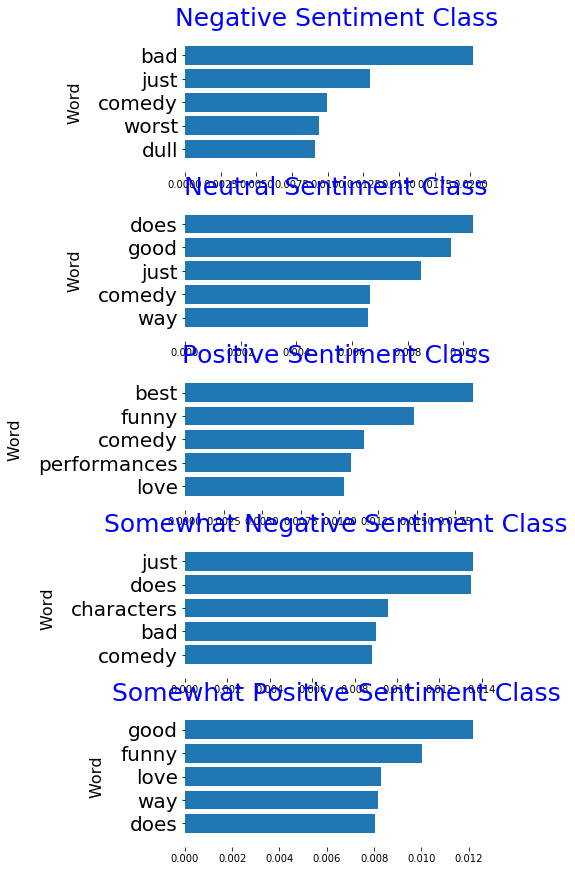

In [84]:
class_Xtr = tfidf_vectorizor.transform(fullSent['Phrase'])
class_y = fullSent['sentiment_label']
class_features = tfidf_vectorizor.get_feature_names()
class_top_dfs = top_feats_by_class(class_Xtr, class_y, class_features)
plot_tfidf_classfeats_h(class_top_dfs, 7)

Train/Test Splitting

In [0]:
# All labled data
phrase = fullSent['Phrase']
sentiment = fullSent['Sentiment']


#phrase = np.array(train['Phrase'])
#sentiment = np.array(train['Sentiment'])

In [133]:
phrase.shape, sentiment.shape

((8529,), (8529,))

In [134]:
# Check data arrangement
phrase[0], sentiment[0]

('A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
 1)

In [0]:
# build train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(phrase, 
                                                    sentiment, 
                                                    test_size=0.2, 
                                                    random_state=4)

In [136]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((6823,), (6823,), (1706,), (1706,))

Vectorization

In [0]:
# Method 1 - BoW
train_bow = BoW_vectorizer.transform(X_train)
test_bow = BoW_vectorizer.transform(X_test)

In [0]:
# Method 2 - TF-IDF
train_tfidf = tfidf_vectorizor.fit_transform(X_train)
test_tfidf = tfidf_vectorizor.transform(X_test)

**Step 4**: Model Building and Traning

In [0]:
# Helper function to train and predict
def train_model_predict (classifier, train_features, train_labels,
                      test_features):
    classifier.fit(train_features, train_labels)
    predictions = classifier.predict(test_features)
    return predictions

In [0]:
MNB = MultinomialNB() # Naive Bayes Model

# Naive Bayes Model on TF-IDF vector
MNB_TFIDF_y_= train_model_predict(MNB, 
                                  train_tfidf, Y_train,
                                  test_tfidf)
# Naive Bayes Model on BoW vector
MNB_BOW_y_ = train_model_predict(MNB, 
                                 train_bow, Y_train,
                                 test_bow)

In [0]:
LR = LogisticRegression(solver = 'liblinear', 
                        multi_class = 'ovr') # Logistic Regression

# Logistic Regression on TF-IDF vector
LR_TFIDF_y_ = train_model_predict(LR, train_tfidf, Y_train,
                                  test_tfidf)
# Naive Bayes Model on BoW vector
LR_BOW_y_ = train_model_predict(LR, 
                                 train_bow, Y_train,
                                 test_bow)

**Step 5**: Performance Evaluation

In [0]:
# Helper function for handling printing organization
def get_metrics(true_labels, predicted_labels, feature):  
    print(feature)
    print('Accuracy:', np.round(metrics.accuracy_score(true_labels, 
                                               predicted_labels), 4))
    print('Precision:', np.round(metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'), 4))
    print('Recall:', np.round(metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'), 4))
    print('F1 Score:', np.round(metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'), 4))
    print('\n')

In [143]:
get_metrics(MNB_TFIDF_y_, Y_test, 'Naive Bayes & TF-IDF Scores: ')
get_metrics(MNB_BOW_y_, Y_test, 'Naive Bayes & Bag of Words Scores: ')

Naive Bayes & TF-IDF Scores: 
Accuracy: 0.3804
Precision: 0.576
Recall: 0.3804
F1 Score: 0.4374


Naive Bayes & Bag of Words Scores: 
Accuracy: 0.3693
Precision: 0.3954
Recall: 0.3693
F1 Score: 0.3777




In [144]:
get_metrics(LR_TFIDF_y_, Y_test, 'Logistic Regression & TF-IDF Scores: ')
get_metrics(LR_BOW_y_, Y_test, 'Logistic Regression & Bag of Words Scores: ')

Logistic Regression & TF-IDF Scores: 
Accuracy: 0.3681
Precision: 0.4713
Recall: 0.3681
F1 Score: 0.3969


Logistic Regression & Bag of Words Scores: 
Accuracy: 0.3593
Precision: 0.3892
Recall: 0.3593
F1 Score: 0.368




# **Question:** 
1.   What did you observe from the results?
2.   How can we improve the performance?






*How work/Assignment # 3*: Build 7-layer neural network.

Credits to https://www.kaggle.com/occam19/tf-idf-vs-bag-of-words